# Import Libraries

In [1]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv('cleaned_citibike_data.csv', index_col = 0)

In [3]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
ride_id,,,,,,,,,,,,
25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6
FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8
22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3
1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3
2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4


In [4]:
# Reset index to make ride_id a normal column
df.reset_index(inplace=True)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6
1,FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8
2,22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3
3,1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3
4,2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4


# Create a new column with the value of 1

In [6]:
# Drop rows with missing end_station_name
df = df.dropna(subset=["end_station_name"])

In [7]:
# Create a new column with a value of 1
df["value"] = 1

In [8]:
# Group by start and end station and count trips
df_group = df.groupby(["start_station_name", "end_station_name"])["value"].count().reset_index()

In [9]:
# Rename the count column for clarity
df_group.rename(columns={"value": "trip_count"}, inplace=True)

In [10]:
# Keep only the required three columns
df_group = df_group[["start_station_name", "end_station_name", "trip_count"]]

In [11]:
print(df_group['trip_count'].sum())
print(df.shape)

297645
(297645, 14)


In [12]:
df_group

,start_station_name,end_station_name,trip_count
0,1 Ave & E 110 St,1 Ave & E 110 St,8
1,1 Ave & E 110 St,1 Ave & E 68 St,1
2,1 Ave & E 110 St,1 Ave & E 94 St,1
3,1 Ave & E 110 St,2 Ave & E 104 St,5
4,1 Ave & E 110 St,2 Ave & E 125 St,1
...,...,...,...
149633,Yankee Ferry Terminal,Pioneer St & Van Brunt St,1
149634,Yankee Ferry Terminal,Soissons Landing,34
149635,Yankee Ferry Terminal,South St & Gouverneur Ln,1
149636,Yankee Ferry Terminal,West St & Chambers St,2


In [13]:
df_group['trip_count'].describe()

count    149638.000000
mean          1.989100
std           2.300792
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         135.000000
Name: trip_count, dtype: float64

In [14]:
df_group['trip_count'].sort_index().value_counts()

trip_count
1     92902
2     26929
3     12121
4      6367
5      3659
      ...  
46        1
76        1
59        1
49        1
52        1
Name: count, Length: 63, dtype: int64

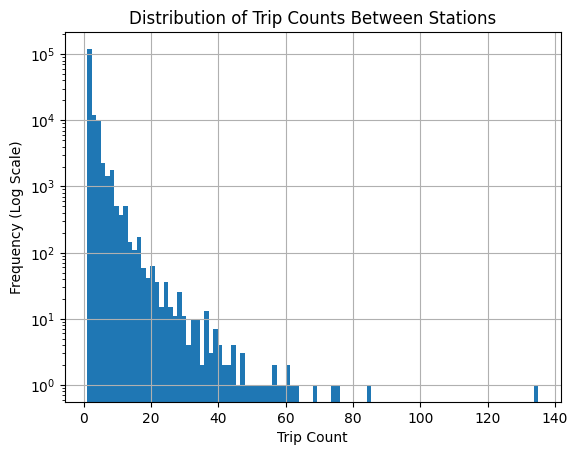

In [15]:
# Plot histogram of trip counts between stations to see distribution
df_group['trip_count'].hist(bins=100)
plt.yscale('log')  # Log scale to handle skewness
plt.xlabel("Trip Count")
plt.ylabel("Frequency (Log Scale)")
plt.title("Distribution of Trip Counts Between Stations")
plt.show()

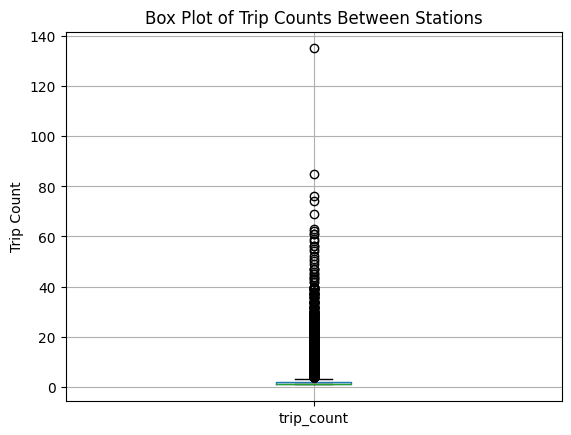

In [16]:
# Create a box plot to visualize the distribution of trip counts
df_group.boxplot(column='trip_count')

# Add labels and title
plt.ylabel("Trip Count")
plt.title("Box Plot of Trip Counts Between Stations")

# Show the plot
plt.show()

In [17]:
df_group.to_csv('df_groupby_final.csv')

# Initialize an instance of a kepler.gl map

In [18]:
# Merge the two dataframes on 'start_station_name' and 'end_station_name'
df_merged = pd.merge(df, df_group, on=["start_station_name", "end_station_name"], how="left")

# Display the first few rows of the merged dataframe to verify
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,trip_count
0,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6,1,10
1,FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8,1,4
2,22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3,1,1
3,1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3,1,1
4,2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4,1,13


In [19]:
# Select the relevant columns
df_final = df_merged[['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'trip_count']]

# Display the first few rows of the new dataframe
df_final.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_count
0,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,10
1,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,4
2,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,1
3,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,1
4,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,13


In [20]:
df_final.isnull().sum()

start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
trip_count            0
dtype: int64

In [21]:
df_final.describe()

,start_lat,start_lng,end_lat,end_lng,trip_count
count,297645.000000,297645.000000,297645.000000,297645.000000,297645.000000
mean,40.740482,-73.975289,40.740250,-73.975425,4.650409
std,0.038872,0.025791,0.038839,0.025827,6.974391
min,40.633355,-74.027472,40.633385,-74.064194,1.000000
25%,40.716012,-73.993790,40.715815,-73.993915,1.000000
50%,40.739355,-73.981656,40.739126,-73.981693,3.000000
75%,40.763189,-73.959295,40.763026,-73.959432,5.000000
max,40.882267,-73.881450,40.882260,-73.881450,135.000000


In [22]:
import gc # this is garbage collector - speeds up performance
gc.collect()

21186

In [23]:
df_final.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_count
0,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,10
1,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,4
2,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,1
3,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,1
4,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,13


## Plot the map

In [24]:
df_final.to_csv('df_final_locations_for_map.csv')

In [25]:
import keplergl
# Create KeplerGl instance with the dataset
m = keplergl.KeplerGl(height=700, data={"BikeTrips": df_final})

# Display the map
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'BikeTrips':                  start_station_name                   end_station_name  \
0       …

### Customization of Map Output

I customized the colour scheme and appearance of the map's points and arcs to make the visualization more intuitive and visually appealing:

1. **Start Point (Purple):**
   - The start points of the bike trips are coloured **purple** to represent the origin of each trip. Purple is a vibrant colour that stands out against the map's background, making it easy to identify where trips begin.

2. **End Point (Orange):**
   - The endpoints are coloured **orange**, providing a clear contrast with the start points. This colour helps distinguish the destination of each trip, enabling a better comparison between the starting and ending locations.

3. **Arcs (Source - Pink, Target - Yellow):**
   - The arcs connecting the start and end points are customized with **pink** for the source and **yellow** for the target. These colours were chosen for their visual contrast and to create a noticeable difference between each trip's source and target points.

4. **Arc Stroke (3.4):**
   - The arc's stroke width was set to **3.4** to make the arcs more prominent, ensuring they are easily visible on the map. This setting ensures that the arcs stand out without being too overwhelming.

By selecting these colours and adjusting the stroke, the map becomes more user-friendly and provides a clear, distinct visualization of the trips between stations.

# Add a filter to your map and use it to see what the most common trips are in New York City. What else makes an impression?

- **A filter was applied to show trips with counts between 20 and 135**, highlighting the most popular connections within the CitiBike network.

### Key Observations:

- **Central Park S & 6 Ave is the busiest location**, with multiple trips starting and ending at the same spot, all with a trip count of **135**.
- **Roosevelt Island Tramway, Soissons Landing, and 5 Ave & E 72 St** are other frequently used stations with high trip counts (**85, 76, and 69**, respectively).
- **These locations are popular tourist spots**:
  - **Central Park S & 6 Ave**: This is a major entry point to Central Park, near famous landmarks like The Plaza Hotel and 5th Avenue shopping.
  - **Roosevelt Island Tramway**: A well-known tourist attraction offering scenic views of Manhattan.
  - **Soissons Landing**: Located on Governors Island, a seasonal recreational area.
  - **5 Ave & E 72 St**: Near Bethesda Terrace, a famous spot in Central Park.
- The most common trips seem to be either within recreational areas or near transit hubs, suggesting a high demand for **short, leisurely rides** rather than long-distance commuting.

# Create a config object and save your map with it

In [26]:
import json

# Extract the config
config = m.config

# Save the updated config to a JSON file
with open("config.json", "w") as f:
    json.dump(config, f)

In [27]:
# Save the map with the extracted config
m.save_to_html(file_name="New York Citibike Trips Aggregated.html", config=config)

Map saved to New York Citibike Trips Aggregated.html!
